In [9]:
#@title imports
from skimage.io import imread_collection


import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import random
import cv2

random.seed(10)
np.random.seed(10)

In [2]:
#@title importar data
!git clone https://github.com/Stgo-Sfr/ReconProyect.git


Cloning into 'ReconProyect'...
remote: Enumerating objects: 56, done.
remote: Total 56 (delta 0), reused 0 (delta 0), pack-reused 56
Unpacking objects: 100% (56/56), done.


In [11]:
col = imread_collection('fotos/*.*')
len(col)

50

In [ ]:
#@title Definicion Funciones
def descs(col):  
  caracts = [[0 for x in range(128)] for y in range(len(col)*100)] 

  for i in range(len(col)):
    img = col[i]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Empleamos modulo externo para extraer 
    # descriptores con algoritmo SIFT
    #sift = cv2.xfeatures2d.SIFT_create(nfeatures=100) 

    sift  = cv2.SIFT_create(nfeatures=100,nOctaveLayers=10) 
    ######## con 10 layers da mas menos 100 puntos, revisar en otros objetos ##########

    # Extracción de descriptores
    key_query,desc_query = sift.detectAndCompute(img,None) # key_query: puntos interes encontrados 
    #print(key_query)
    #len(desc_query)                                       # desc_query: descriptores sift
    #print(len(desc_query),len(desc_query[0]))
    for k in range(100):
      for j in range(128):
       caracts[k + i*100][j] = desc_query[k][j] 
    
     
    
  caracts=pd.DataFrame(caracts)
  #print(caracts)
  return caracts

In [ ]:
#@title Extraccion descriptores sift
col_0 = imread_collection("pato/*")
col_1 = imread_collection("garfo/*")

#guradado de descriptores sift
des_0 = descs(col_0)
des_1 = descs(col_1)



In [ ]:
des_0

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,23.0,2.0,0.0,0.0,58.0,10.0,0.0,0.0,142.0,2.0,...,0.0,2.0,65.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,18.0,4.0,...,0.0,0.0,39.0,79.0,118.0,4.0,0.0,1.0,1.0,1.0
2,1.0,1.0,8.0,2.0,0.0,0.0,0.0,0.0,40.0,7.0,...,0.0,1.0,21.0,41.0,138.0,43.0,0.0,0.0,0.0,3.0
3,1.0,5.0,7.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,...,19.0,145.0,8.0,1.0,0.0,0.0,0.0,0.0,91.0,83.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,4.0,...,0.0,0.0,0.0,1.0,78.0,76.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,55.0,1.0,...,0.0,1.0,0.0,0.0,2.0,53.0,134.0,0.0,0.0,0.0
496,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,161.0,4.0,...,0.0,0.0,93.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
497,67.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,170.0,13.0,...,0.0,0.0,44.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
498,32.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,174.0,0.0,...,0.0,0.0,48.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0


#VQ (despues integrar al clasificador para usar optuna cambiando features u otro parametro si es que hay)

In [ ]:
#@title funciones para VQ 
import numpy as np
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from scipy.cluster import vq
from sklearn import neighbors
from sklearn.datasets import make_blobs
from itertools import combinations, tee

from sklearn.preprocessing import StandardScaler

def reduc_desc(descriptores,caracteristicas,clase):

  np.random.seed(10)

  X = descriptores.T

  new_X = StandardScaler().fit_transform(X)


  #normalizamos los datos
  obs = vq.whiten(new_X)


  #implementación de kmeans para VectorQuantization
  codebook = vq.kmeans(obs, caracteristicas, iter=10)
  bk = codebook[0]

  #insertar clase 
  bk = pd.DataFrame(bk.T)
  bk.insert(loc = caracteristicas, column = "clase", value = clase)
  return bk


def reduc_desc_noclass(descriptores,caracteristicas):

  np.random.seed(10)

  X = descriptores.T

  new_X = StandardScaler().fit_transform(X) 


  #normalizamos los datos
  obs = vq.whiten(new_X)


  #implementación de kmeans para VectorQuantization
  codebook = vq.kmeans(obs, caracteristicas, iter=10)
  bk = codebook[0]
  bk = pd.DataFrame(bk.T)
  return bk

In [ ]:
n_caract = 99 #valor a optimizar 
clase = 0 #clase objeto
red_des_0 = reduc_desc(des_0, n_caract, clase)
red_des_0

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,clase
0,-0.420406,-0.420406,0.022639,-0.420406,0.417787,-0.420406,0.202251,-0.420406,-0.420406,-0.420406,...,-0.264742,-0.420406,-0.420406,3.315537,-0.420406,2.980260,-0.420406,-0.420406,-0.420406,0
1,-0.484879,-0.509665,-0.509665,-0.410520,1.051862,2.415099,1.745873,-0.360948,-0.509665,-0.509665,...,1.163399,2.167238,-0.509665,2.712533,-0.509665,-0.063514,-0.509665,1.597157,-0.509665,0
2,-0.489831,-0.514991,-0.540151,-0.439511,1.522957,2.931909,2.328073,-0.414351,-0.540151,-0.540151,...,0.554303,2.541931,-0.540151,2.894169,-0.540151,0.466244,-0.540151,0.717842,-0.540151,0
3,-0.487880,-0.487880,0.064872,-0.487880,-0.463313,-0.487880,-0.266779,-0.487880,0.347389,-0.487880,...,-0.475597,0.568490,-0.487880,2.496978,-0.094812,-0.414180,-0.389613,-0.487880,0.101722,0
4,0.316463,-0.513810,-0.526389,-0.513810,-0.186733,1.423492,2.656321,0.442262,-0.337691,-0.538969,...,0.090025,0.668699,-0.538969,2.719221,-0.538969,-0.035774,-0.538969,2.354404,-0.538969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.997770,-0.517909,-0.070659,-0.517909,0.053577,-0.468214,2.563143,-0.418520,-0.493061,0.326896,...,-0.468214,-0.343978,3.159476,2.650109,-0.517909,0.848687,-0.493061,-0.269437,-0.443367,0
496,-0.354119,-0.142967,-0.178159,-0.354119,-0.330658,-0.354119,-0.330658,-0.096045,-0.354119,-0.354119,...,-0.049122,-0.354119,-0.354119,3.634300,-0.354119,3.423149,-0.307196,-0.354119,-0.330658,0
497,-0.378042,-0.094925,0.966761,-0.378042,-0.378042,-0.378042,-0.378042,-0.189297,-0.378042,-0.378042,...,-0.071332,-0.378042,-0.378042,3.632774,-0.378042,3.632774,-0.354448,-0.378042,-0.378042,0
498,-0.355469,-0.355469,0.687143,-0.355469,-0.308610,-0.355469,0.066262,-0.144604,-0.355469,-0.355469,...,-0.132889,-0.355469,-0.355469,3.721263,-0.355469,3.721263,-0.332040,-0.355469,-0.355469,0


#clasificacion

In [ ]:
#reducir todas las caracteristicas y unir

red_des_0 = reduc_desc(des_0, n_caract, 0)
red_des_1 = reduc_desc(des_1, n_caract, 1)

des_objetos = [red_des_0,red_des_1]

result = pd.concat(des_objetos)

In [ ]:
result

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,clase
0,-0.420406,-0.420406,0.022639,-0.420406,0.417787,-0.420406,0.202251,-0.420406,-0.420406,-0.420406,...,-0.264742,-0.420406,-0.420406,3.315537,-0.420406,2.980260,-0.420406,-0.420406,-0.420406,0
1,-0.484879,-0.509665,-0.509665,-0.410520,1.051862,2.415099,1.745873,-0.360948,-0.509665,-0.509665,...,1.163399,2.167238,-0.509665,2.712533,-0.509665,-0.063514,-0.509665,1.597157,-0.509665,0
2,-0.489831,-0.514991,-0.540151,-0.439511,1.522957,2.931909,2.328073,-0.414351,-0.540151,-0.540151,...,0.554303,2.541931,-0.540151,2.894169,-0.540151,0.466244,-0.540151,0.717842,-0.540151,0
3,-0.487880,-0.487880,0.064872,-0.487880,-0.463313,-0.487880,-0.266779,-0.487880,0.347389,-0.487880,...,-0.475597,0.568490,-0.487880,2.496978,-0.094812,-0.414180,-0.389613,-0.487880,0.101722,0
4,0.316463,-0.513810,-0.526389,-0.513810,-0.186733,1.423492,2.656321,0.442262,-0.337691,-0.538969,...,0.090025,0.668699,-0.538969,2.719221,-0.538969,-0.035774,-0.538969,2.354404,-0.538969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.422418,-0.634455,-0.634455,0.187189,-0.316399,-0.409165,-0.183876,-0.634455,-0.554941,-0.660959,...,-0.660959,-0.581445,-0.660959,-0.515184,-0.643290,-0.435670,-0.660959,-0.236885,-0.581445,1
496,3.100943,0.167766,-0.666440,-0.370431,-0.666440,-0.652985,-0.531891,-0.693350,-0.693350,-0.693350,...,-0.289702,0.356135,-0.666440,-0.679895,-0.585710,-0.060968,-0.666440,-0.693350,-0.693350,1
497,1.272637,0.926273,-0.499147,0.153616,0.926273,-0.659007,3.004456,0.939595,-0.139461,-0.565755,...,-0.352608,-0.299322,-0.086175,-0.672329,-0.565755,-0.579077,0.020399,-0.539112,-0.512469,1
498,2.842154,-0.381112,2.842154,-0.706148,-0.597803,-0.543630,0.350217,-0.448828,0.756511,2.842154,...,-0.706148,-0.706148,2.219170,-0.340483,-0.706148,-0.679061,0.919029,-0.706148,-0.651975,1


In [ ]:
#@title Carga datos testeo

col_test = imread_collection("test_1_imag/*")
des_test = descs(col_test)


test_point= pd.DataFrame(reduc_desc_noclass(des_test ,100))

test_point

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.037367,-0.508236,-0.508236,-0.086932,1.102629,-0.433888,3.233927,-0.508236,-0.483453,-0.409105,...,-0.272802,2.812624,-0.483453,3.134798,-0.483453,-0.012585,-0.508236,-0.495844,-0.508236,2.490452
1,-0.552435,-0.658410,0.917965,-0.631916,-0.658410,-0.525941,-0.658410,-0.658410,2.679796,-0.658410,...,-0.658410,-0.631916,-0.075548,2.679796,2.679796,-0.631916,-0.181523,-0.645163,-0.340485,2.202909
2,-0.031660,-0.501161,-0.501161,-0.130503,1.302710,-0.501161,3.279555,-0.501161,-0.476451,-0.476451,...,-0.451740,2.389975,-0.501161,3.279555,-0.501161,0.017761,-0.501161,-0.501161,-0.501161,2.735923
3,-0.486749,0.101949,-0.462220,-0.437691,0.052891,-0.486749,1.647283,-0.437691,-0.364104,-0.462220,...,-0.486749,0.347240,-0.462220,3.143558,-0.486749,3.143558,-0.486749,-0.486749,-0.486749,3.143558
4,-0.511510,-0.461928,0.418156,-0.511510,-0.040479,-0.486719,3.058410,-0.387555,-0.337973,-0.437137,...,-0.499115,3.058410,-0.461928,2.091557,-0.511510,1.149494,0.083476,-0.511510,2.215513,3.058410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.471213,-0.373457,2.583652,-0.471213,-0.177946,-0.471213,0.017565,-0.446774,-0.471213,-0.471213,...,0.640758,-0.202385,-0.471213,3.316820,-0.471213,3.316820,0.701855,-0.471213,2.314824,3.316820
96,-0.361479,-0.338028,-0.209046,-0.361479,0.107546,-0.338028,0.576572,0.224802,-0.361479,-0.361479,...,0.025467,0.365510,-0.361479,3.906653,-0.361479,3.085858,-0.291126,-0.255949,-0.338028,3.906653
97,-0.430432,0.075472,1.267959,-0.430432,-0.430432,-0.430432,-0.406342,-0.430432,-0.069072,-0.430432,...,-0.418387,-0.430432,-0.261798,3.689071,-0.358160,0.436831,-0.430432,-0.430432,-0.430432,3.689071
98,0.141992,-0.536741,-0.385912,-0.536741,-0.184806,0.795587,1.801118,-0.511603,1.147523,-0.536741,...,-0.046545,0.116854,-0.360773,3.032893,-0.260220,-0.411050,-0.511603,0.028870,-0.436188,2.153054


In [ ]:

from sklearn import datasets
import scipy as sp
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


iris = datasets.load_iris()
X = iris.data[:, 0:3]
y = iris.target
h = 1  # step size in the mesh

xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size= 0.5)

clases= list(set(tuple(sorted(y))))


""""recorremos los datos para cada clase del conjunto de 
    entrenamiento y calculamos la distancia de Mahalanobis
    entre cada punto y la clase_i
"""
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h),
                     np.arange(z_min, z_max, h))

x_test_c= np.c_[xx.ravel(), yy.ravel(),zz.ravel()]
mahal_c = np.empty([np.size(x_test_c,0),np.size(clases)])

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
                            
for class_i in clases:
    #extraemos solo un conjunto por clase
    xtrain_pos = xtrain[ytrain == class_i, :]  
    
    mu = np.mean(xtrain_pos, axis=0)
    dss = x_test_c-mu
    
    cov = np.cov(xtrain_pos.T)
    inv_covmat = sp.linalg.inv(cov)
    
    left_term=np.dot(dss,inv_covmat)
    temp = np.dot(left_term,dss.T)
    mahal_c[:,class_i]= np.diag(temp)

# buscamos en cada columna el menor valor. 
# Su posición indica la mejor clase
predicted= np.argmin(mahal_c, axis=1)
expected= ytest

predicted

array([1, 0, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2,
       2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0,
       0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2,
       0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2,
       2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1,
       1, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0,
       0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2,
       0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2,
       2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0,
       1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2])

In [ ]:
expected

array([0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1,
       2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 0, 0, 1, 2, 2, 0,
       2, 0, 2, 1, 0, 0, 0, 2, 1])

TypeError: ignored

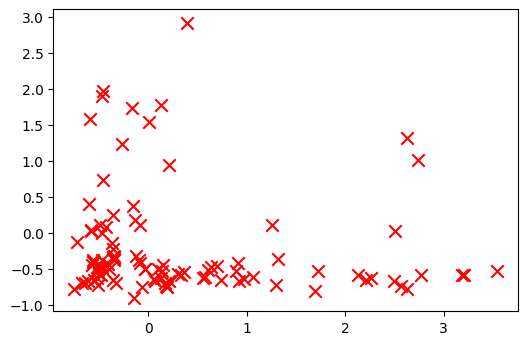

In [ ]:


#data
D = result
 
data = np.array(D)
  
#buscamos el numero de clases del problema (en la última columna)
no_class = 2
#extraemos la última columna
id_class = data[:,-1]

#quitamos la clase de los datos
data = data[:,:2]
distance = np.zeros((no_class,1))

plt.figure(dpi=100)
plt.scatter(test_point[0], test_point[1], marker='x', color='red', s=80)

#recorremos cada una de las clase
for ic in range(0,no_class): 

    #seleccionamos la clase según el indice
    idx = np.where(id_class==ic+1)
    cluster = data[idx]
    
    #graficamos cada subgrupo de datos
    plt.scatter(cluster[:,0],cluster[:,1], marker='o', label=f'Clase {ic+1}')
    
    #centramos los datos
    mean_data = (test_point - np.mean(cluster, axis=0)).reshape(1,-1)
    
    #calculamos la matriz de covarianza inversa
    invCov = np.linalg.inv(np.cov(cluster,rowvar=False))
    
    #calculamos la metrica de distancia de Mahalanobis
    distance[ic] = np.matmul(np.matmul(mean_data,invCov),mean_data.T)

    print(f'Distancia punto {test_point} y data: {distance[ic]}')

plt.grid(alpha=0.2)
plt.legend()
plt.show()


# Clasificación final
id_min = np.argmin(distance)
print(f'Punto {test_point} es clasificado como clase {id_min+1}')

#testeo

In [ ]:
#creación del arreglo para guardar los descriptores SIFT
Matrix = [[0 for x in range(128)] for y in range(5*100)] 


for i in range(len(col)):
  img = col[i]
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Empleamos modulo externo para extraer 
  # descriptores con algoritmo SIFT
  #sift = cv2.xfeatures2d.SIFT_create(nfeatures=100) 

  sift  = cv2.SIFT_create(nfeatures=100,nOctaveLayers=10) 
  ######## con 10 layers da mas menos 100 puntos, revisar en otros objetos ##########

  # Extracción de descriptores
  key_query,desc_query = sift.detectAndCompute(img,None) # key_query: puntos interes encontrados 
  #print(key_query)
  #len(desc_query)                                       # desc_query: descriptores sift
  #print(len(desc_query),len(desc_query[0]))
  for k in range(100):
    for j in range(128):
     Matrix[k + i*100][j] = desc_query[k][j] 
  
df_Matrix = pd.DataFrame(Matrix)
df_Matrix